# Lab. 9, Jakub Margol

In [3]:
using Pkg
Pkg.add("Plots")
Pkg.add("DataFrames")
Pkg.add("LinearAlgebra")
Pkg.add("Polynomials")
Pkg.add("CSV")
using Plots
using DataFrames
using Statistics
using LinearAlgebra
using Polynomials
using CSV

  Resolving package versions...
No Changes to `~/Project.toml`
No Changes to `~/Manifest.toml`
  Resolving package versions...
No Changes to `~/Project.toml`
No Changes to `~/Manifest.toml`
  Resolving package versions...
No Changes to `~/Project.toml`
No Changes to `~/Manifest.toml`
  Resolving package versions...
No Changes to `~/Project.toml`
No Changes to `~/Manifest.toml`
  Resolving package versions...
No Changes to `~/Project.toml`
No Changes to `~/Manifest.toml`
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278
┌ Info: Precompiling DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0]
└ @ Base loading.jl:1278
┌ Info: Precompiling CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1278


In [5]:
1+1

2

In [6]:
A = rand(10,10)

10×10 Array{Float64,2}:
 0.6558     0.523452  0.622195    …  0.831447   0.575591   0.219808
 0.155987   0.59607   0.826846       0.858414   0.0512368  0.510252
 0.780425   0.584174  0.78046        0.911073   0.791419   0.723485
 0.760079   0.360944  0.00218388     0.744916   0.0619367  0.525791
 0.151523   0.414489  0.17411        0.322487   0.9196     0.879077
 0.0179283  0.916908  0.114823    …  0.0772383  0.0738202  0.530065
 0.833908   0.595615  0.111239       0.254818   0.334579   0.10064
 0.875824   0.735915  0.645748       0.593072   0.240679   0.157983
 0.89173    0.476032  0.61548        0.70858    0.623652   0.161825
 0.878574   0.950179  0.46061        0.644358   0.214797   0.00691604

In [7]:
xo = rand(10)

10-element Array{Float64,1}:
 0.3768366631977744
 0.37232078508540023
 0.5684742350929279
 0.8916788081864582
 0.043442674780844515
 0.04480392585104842
 0.4923834414216224
 0.2518118128379885
 0.5569350507813453
 0.08289269989670545

In [8]:
b = A*xo

10-element Array{Float64,1}:
 2.168568769600598
 2.180315104930739
 2.0875184349124334
 1.1481470602546535
 1.5867433155929438
 1.2048890751563104
 1.3806451682304468
 2.4720594145008117
 2.1783352553190305
 2.1569918164642443

In [9]:
x1 = inv(A) * b

10-element Array{Float64,1}:
 0.37683666319777354
 0.37232078508539956
 0.5684742350929279
 0.8916788081864588
 0.04344267478084518
 0.04480392585104842
 0.49238344142162216
 0.2518118128379889
 0.5569350507813462
 0.08289269989670567

In [10]:
x2 = A\b

10-element Array{Float64,1}:
 0.37683666319777476
 0.37232078508539934
 0.5684742350929279
 0.8916788081864591
 0.04344267478084359
 0.04480392585104888
 0.4923834414216223
 0.2518118128379879
 0.5569350507813461
 0.08289269989670565

In [11]:
Af = factorize(A)
x3 = Af\b

10-element Array{Float64,1}:
 0.37683666319777476
 0.37232078508539934
 0.5684742350929279
 0.8916788081864591
 0.04344267478084359
 0.04480392585104888
 0.4923834414216223
 0.2518118128379879
 0.5569350507813461
 0.08289269989670565

In [12]:
#Pomocnicza funkcja do wyliczania długości wektora, bo nie mogłem żadnej znaleźć :c
function len(vec)
    sum = 0
    for x in vec
       sum += x*x
    end
    sqrt(sum)
end

len (generic function with 1 method)

In [13]:
r1 = abs(len(x1) - len(xo))

4.440892098500626e-16

In [14]:
r2 = abs(len(x2) - len(xo))

6.661338147750939e-16

In [15]:
r3 = abs(len(x3) - len(xo))

6.661338147750939e-16

In [16]:
wyniki = DataFrame(A = String[], B = Float64[], C = Float64[])
colnames = ["Metoda","Różnica dł.","Czas"]

rename!(wyniki, Symbol.(colnames))

,Metoda,Różnica dł.,Czas
,String,Float64,Float64


### Pomiary wykonuję 10 razy dla losowych wartości wektora (1000) i macierzy (1000x1000)

Mierzę wyniki dla: mnożenia po użyciu inv, wbudowanego operatora "\", funkcji factorize wraz z operatorem "\" oraz samego dzielenia już po zastosowaniu funkcji factorize (czas dzielenia dla macierzy po faktoryzacji)

In [17]:
for i in 1:10
    xo = rand(1000) 
    A = rand(1000,1000)
    b = A*xo

    t1 = (@timed x1 = inv(A)*b).time
    t2 = (@timed x2 = A\b).time
    t3 = (@timed x3 = factorize(A)\b).time
    Af = factorize(A)
    t4 = (@timed x4 = Af\b).time

    push!(wyniki,("inv", abs(len(x1)-len(xo)), t1))
    push!(wyniki,("operator dzielenia", abs(len(x2)-len(xo)), t2))
    push!(wyniki,("factorize + dzielenie", abs(len(x3)-len(xo)), t3))
    push!(wyniki,("samo dzielenie po faktoryzacji", abs(len(x4)-len(xo)), t4))
end

In [18]:
wyniki

,Metoda,Różnica dł.,Czas
,String,Float64,Float64
1,inv,7.29372e-12,1.0926
2,operator dzielenia,2.31992e-12,0.303242
3,factorize + dzielenie,2.31992e-12,0.303619
4,samo dzielenie po faktoryzacji,2.31992e-12,0.00116848
5,inv,2.52953e-12,0.748882
6,operator dzielenia,2.16716e-13,0.512672
7,factorize + dzielenie,2.16716e-13,0.792809
8,samo dzielenie po faktoryzacji,2.16716e-13,0.00145749
9,inv,6.03961e-14,2.09403


In [19]:
grouped = groupby(wyniki, :1)

,Metoda,Różnica dł.,Czas
,String,Float64,Float64
1,inv,7.29372e-12,1.0926
2,inv,2.52953e-12,0.748882
3,inv,6.03961e-14,2.09403
4,inv,1.22924e-12,0.704483
5,inv,8.17124e-14,1.38628
6,inv,2.87059e-12,0.701452
7,inv,2.4869e-13,0.700046
8,inv,2.4869e-13,0.599872
9,inv,3.73035e-12,0.597316


In [20]:
tm = combine(grouped ,"Czas" => mean)
tmp = combine(grouped ,"Czas" => std)
tmm = combine(grouped, "Różnica dł." => mean)
tmm2 = combine(grouped, "Różnica dł." => std)
tm."Odchylenie st. (czas)" = tmp."Czas_std"
tm."Średnia różnica dł." = tmm."Różnica dł._mean"
tm."Odchylenie st. (dł)" = tmm2."Różnica dł._std"
rename!(tm, "Czas_mean" => "Średni czas wykonania")

,Metoda,Średni czas wykonania,Odchylenie st. (czas),Średnia różnica dł.
,String,Float64,Float64,Float64
1,inv,0.933606,0.476775,1.91918e-12
2,operator dzielenia,0.392036,0.237099,3.74101e-13
3,factorize + dzielenie,0.450411,0.202436,3.74101e-13
4,samo dzielenie po faktoryzacji,0.00130183,0.00014462,3.74101e-13


## Tabela z podsumowaniem wyników pomiarów

In [21]:
select(tm, Not(:3, :5))

,Metoda,Średni czas wykonania,Średnia różnica dł.
,String,Float64,Float64
1,inv,0.933606,1.91918e-12
2,operator dzielenia,0.392036,3.74101e-13
3,factorize + dzielenie,0.450411,3.74101e-13
4,samo dzielenie po faktoryzacji,0.00130183,3.74101e-13


### Wykresy średnich wartości dla czasu pomiarów i jakości wyników

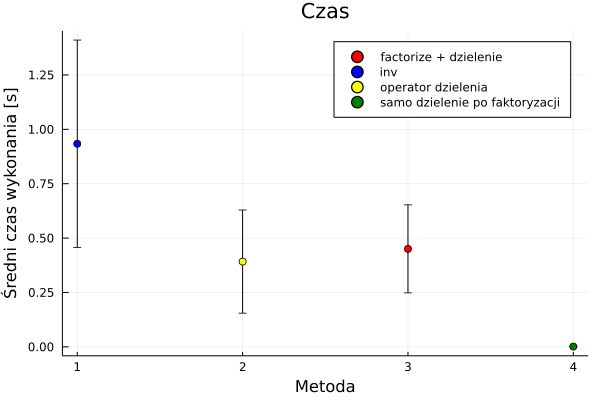

In [22]:
scatter(tm."Średni czas wykonania", group=tm.Metoda, colour = [:red :blue :yellow :green], 
        yerr=tm."Odchylenie st. (czas)")
xlabel!("Metoda")
ylabel!("Średni czas wykonania [s]")
title!("Czas")

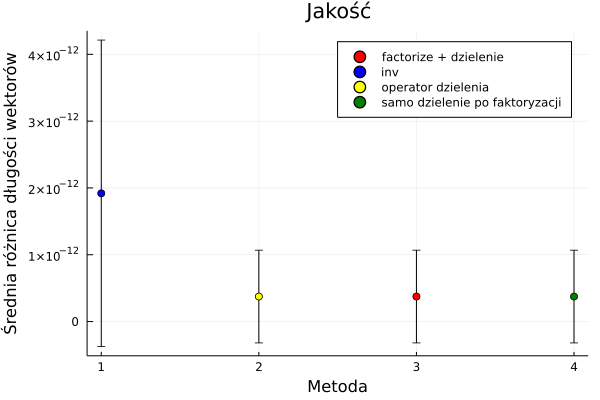

In [23]:
scatter(tm."Średnia różnica dł.", group=tm.Metoda, colour = [:red :blue :yellow :green], 
        yerr=tm."Odchylenie st. (dł)")
xlabel!("Metoda")
ylabel!("Średnia różnica długości wektorów")
title!("Jakość")

### Do policzenia współczynników wielomianu aproksymującego użyję pomiarów czasu mnożenia macierzy funkją "better" z Lab. 4

In [24]:
input = "Pomiary2.csv"
pomiary=CSV.read(input, delim=",",DataFrame)

,Mnożenie,Wielkość macierzy,Średni czas wykonania,Odchylenie st.
,String,Int64,Float64,Float64
1,Better,100,0.0470691,0.0455054
2,Better,200,0.0239522,0.0030377
3,Better,300,0.0828952,0.0127928
4,Better,400,0.17873,0.00777664
5,Better,500,0.340657,0.00580736
6,Better,600,0.610051,0.0238009
7,Better,700,0.962674,0.0283572
8,Better,800,1.47355,0.0585355
9,Better,900,2.07506,0.0561853


Punkty użyte w macierzy:

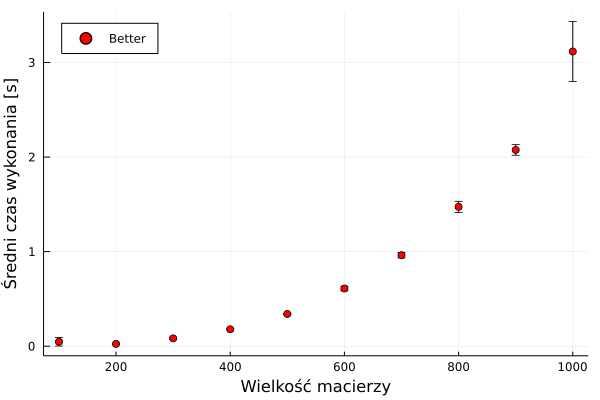

In [33]:
scatter(pomiary."Wielkość macierzy", pomiary."Średni czas wykonania", group=pomiary.Mnożenie, 
    colour = [:red :blue :magenta], yerr=pomiary."Odchylenie st.")
xlabel!("Wielkość macierzy")
ylabel!("Średni czas wykonania [s]")
plot!(legend = :topleft)

In [27]:
xs = pomiary[2]
ys = pomiary[3]

A = zeros(10,3)
A[:,1] = xs.^2
A[:,2] = xs

A

10×3 Array{Float64,2}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

In [35]:
AF = factorize(A)

QRPivoted{Float64,Array{Float64,2}}
Q factor:
10×10 LinearAlgebra.QRPackedQ{Float64,Array{Float64,2}}:
 -0.00628285  -0.180555    0.765207   …  -0.0284868   -0.233895   -0.512314
 -0.0251314   -0.312143    0.425115       0.338725     0.449124    0.54828
 -0.0565456   -0.394764    0.155876      -0.335443    -0.16683     0.0721115
 -0.100526    -0.428418   -0.0425115     -0.00247151   0.0490448   0.109208
 -0.157071    -0.413105   -0.170046      -0.0807517   -0.0194093   0.0591343
 -0.226183    -0.348824   -0.226728   …  -0.139421    -0.0865541  -0.0143963
 -0.30786     -0.235576   -0.212558      -0.178479    -0.15239    -0.111384
 -0.402102    -0.0733617  -0.127535       0.802074    -0.216916   -0.231827
 -0.508911     0.13782     0.028341      -0.197761     0.719867   -0.375728
 -0.628285     0.397969    0.255069      -0.177986    -0.342041    0.456915
R factor:
3×3 Array{Float64,2}:
 -1.59163e6  -1900.56   -2.4189
  0.0         -487.713  -1.85096
  0.0            0.0     0.85023
permu

In [36]:
AF.R\((Transpose(AF.Q)*ys)[1:3])

3-element Array{Float64,1}:
  5.452017864545451e-6
 -0.002872781976933331
  0.37207371531333305

In [37]:
fit(xs,ys, 2)

Polynomial(0.3720737153133321 - 0.00287278197693333*x + 5.452017864545451e-6*x^2)

Wyniki są podobne do otrzymanych przy pomocy funkcji fit.